#Q1

##creating database

###imports

In [15]:
from numpy.random import uniform
from numpy import array

###create first data base with uniform dis

In [16]:
MAX_X1 = 1
MIN_X1 = 0
MAX_X2 = 1
MIN_X2 = -1
SAMPLE = 100
x1 = uniform(MIN_X1, MAX_X1 ,SAMPLE)
x2 = uniform(MIN_X2, MAX_X2 ,SAMPLE)
X =[];
for i in range(len(x1)):
   X.append([x1[i], x2[i]])
X1 =array(X)

###create second data base with uniform dis

In [17]:
MAX_X1 = 3
MIN_X1 = 2
MAX_X2 = 4
MIN_X2 = 3
SAMPLE = 100
x1 = uniform(MIN_X1, MAX_X1 ,SAMPLE)
x2 = uniform(MIN_X2, MAX_X2 ,SAMPLE)
X =[];
for i in range(len(x1)):
   X.append([x1[i], x2[i]])
X2 =array(X)

###create labels

In [37]:
from numpy import concatenate
SAMPLE = 100
Y=[];
for i in range(SAMPLE):
  Y.append(0)
for i in range(SAMPLE):
  Y.append(1)
Y =array(Y)
X =concatenate((X1,X2), axis=0)
#print(X)
#print(Y)

200


# Importing the libraries


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Splitting the dataset into the Training set and Test set


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


## Feature Scaling


In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SVM to the Training set


In [22]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# Predicting the Test set results


In [23]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix and score


In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix :")
print(cm)
print(' accuracy_score =  %.3f    precision_score =  %.3f   recall_score =   %.3f '
       %(accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred)))

confusion matrix :
[[23  0]
 [ 0 27]]
 accuracy_score =  1.000    precision_score =  1.000   recall_score =   1.000 


# Visualising the Training set results


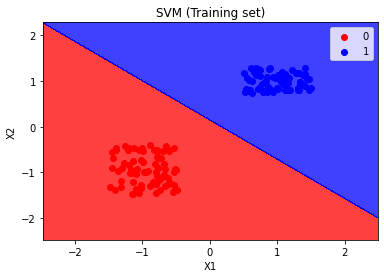

In [42]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# Visualising the Test set results


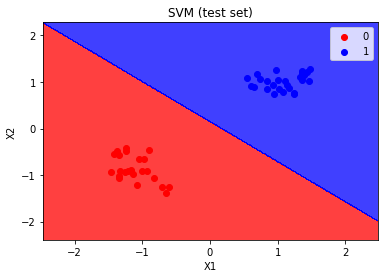

In [33]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (test set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()